In [159]:

'''
@brief   Loadcell (seat, legrest) equation
@author Byunghun Hwang
@Date   2020.12.28
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

raw_seat_loadcell = pd.read_csv('./data/loadcell_seat.csv', header=0, index_col=False)
raw_legrest_loadcell = pd.read_csv('./data/loadcell_legrest.csv', header=0, index_col=False)

y = np.array([0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000])


[]

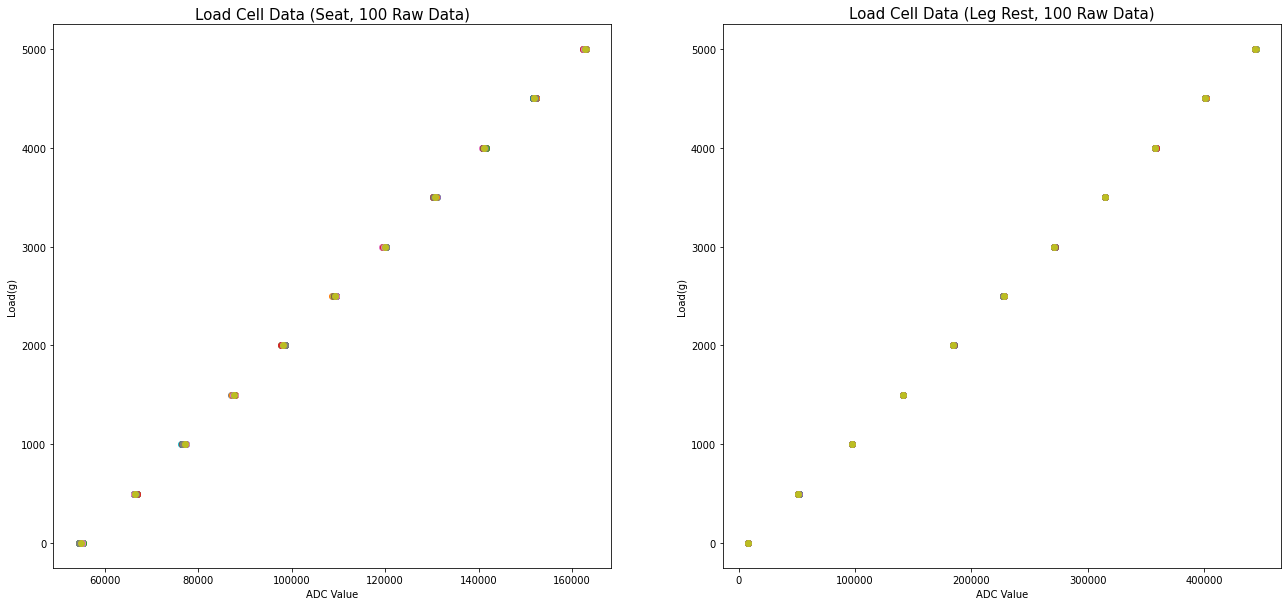

In [160]:
# Draw Raw data graphs
plt.figure(figsize=(22,10))
for row in range(1, raw_seat_loadcell.shape[0]): #number of columns

    seat_x = raw_seat_loadcell.iloc[row]
    legrest_x = raw_legrest_loadcell.iloc[row]
    #plt.plot(single_row, color="red", linestyle="solid", marker="o", markerfacecolor="blue", markersize=8)
    plt.subplot(1, 2, 1)
    plt.title("Load Cell Data (Seat, 100 Raw Data)", fontsize=15)
    plt.xlabel("ADC Value")
    plt.ylabel("Load(g)")
    plt.scatter(seat_x, y)
    plt.subplot(1, 2, 2)
    plt.title("Load Cell Data (Leg Rest, 100 Raw Data)", fontsize=15)
    plt.xlabel("ADC Value")
    plt.ylabel("Load(g)")
    plt.scatter(legrest_x, y)

plt.plot()

[]

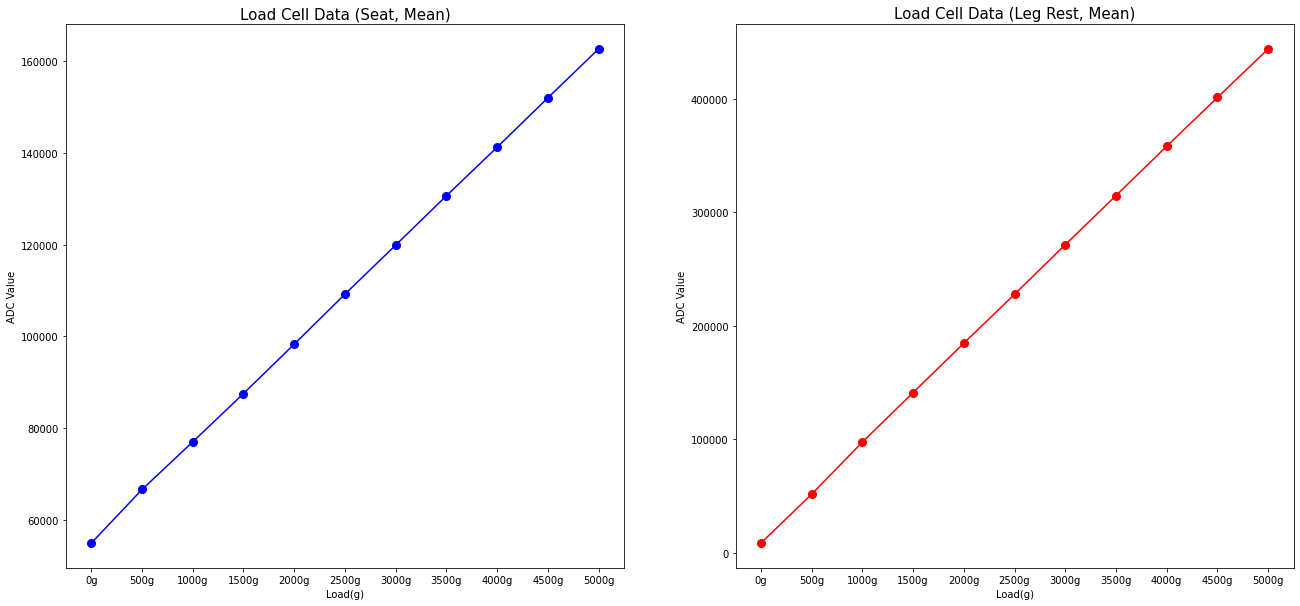

In [192]:
# Draw Mean data graph
plt.figure(figsize=(22,10))

plt.subplot(1, 2, 1)
plt.title("Load Cell Data (Seat, Mean)", fontsize=15)
plt.ylabel("ADC Value")
plt.xlabel("Load(g)")
plt.plot(raw_seat_loadcell.mean(), color="blue", linestyle="solid", marker="o", markerfacecolor="blue", markersize=8)

plt.subplot(1, 2, 2)
plt.title("Load Cell Data (Leg Rest, Mean)", fontsize=15)
plt.ylabel("ADC Value")
plt.xlabel("Load(g)")
plt.plot(raw_legrest_loadcell.mean(), color="red", linestyle="solid", marker="o", markerfacecolor="red", markersize=8)

plt.plot()


In [78]:
# Ordinary Least Squares
import statsmodels.api as sm

y = [0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000]
x = raw_legrest_loadcell.iloc[0]
print(x)
print(y)


model = sm.OLS(y, x) 
result = model.fit()

print(result.summary())
print(result.params)

sm.stats.linear_rainbow(result)

0g         8327
500g      51521
1000g     97606
1500g    141012
2000g    184712
2500g    227774
3000g    271614
3500g    314839
4000g    358570
4500g    401439
5000g    444327
Name: 0, dtype: int64
[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.736e+04
Date:                Mon, 28 Dec 2020   Prob (F-statistic):                    1.60e-18
Time:                        10:49:49   Log-Likelihood:                         -59.993
No. Observations:                  11   AIC:                                      122.0
Df Residuals:                      10   BIC:                                      122.4
Df Model:                          

(3.877870110717468, 0.10525310906206885)

Legrest Regressor Params : w: 0.01, b: -107.35
Seat Regressor Params : w: 0.05, b: -2578.77
Legrest regressor R^2 Score : 0.99996
Seat regressor R^2 Score : 0.99996


array([484.50417304])

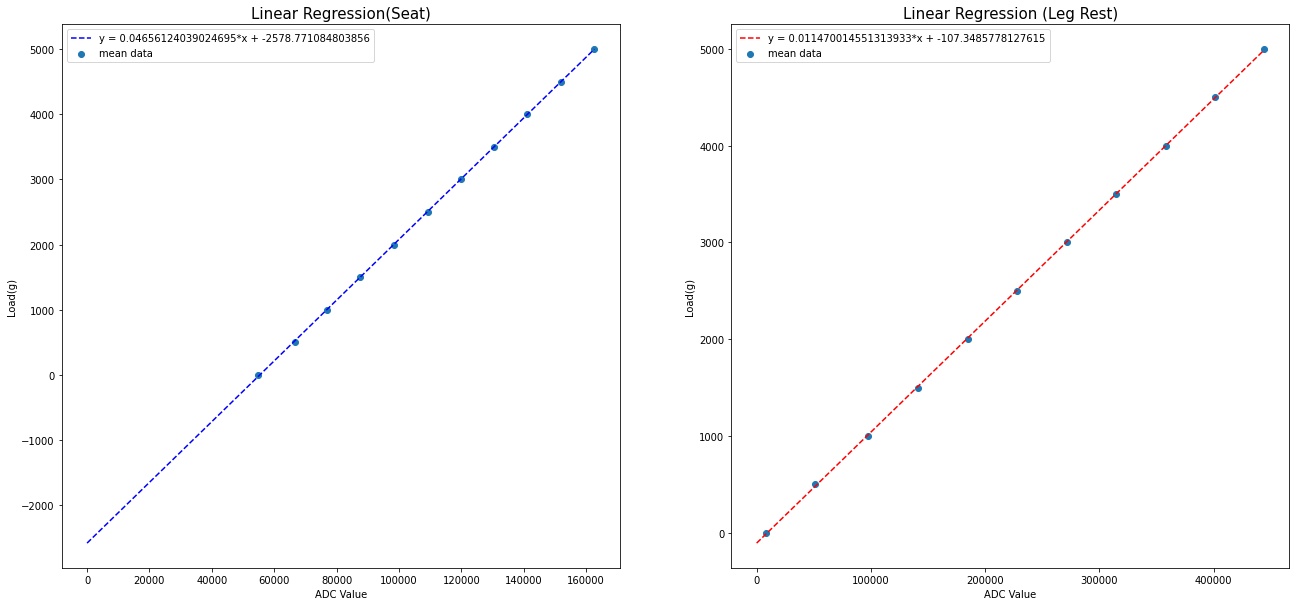

In [294]:
from sklearn import linear_model
from sklearn.metrics import r2_score

# linear regression model
reg_legrest = linear_model.LinearRegression()
reg_seat = linear_model.LinearRegression()

# general y
y = np.array([0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000])

# mean x for each others
x_legrest = raw_legrest_loadcell.mean()
x_seat = raw_seat_loadcell.mean()

# regression model
reg_legrest.fit(raw_legrest_loadcell.mean().values.reshape(-1,1), y)
reg_seat.fit(raw_seat_loadcell.mean().values.reshape(-1,1), y)
print('Legrest Regressor Params : w: {:.2f}, b: {:.2f}'.format(reg_legrest.coef_[0], reg_legrest.intercept_))
print('Seat Regressor Params : w: {:.2f}, b: {:.2f}'.format(reg_seat.coef_[0], reg_seat.intercept_))

# regressor parameters
w_legrest = reg_legrest.coef_[0]
w_seat = reg_seat.coef_[0]
b_legrest = reg_legrest.intercept_
b_seat = reg_seat.intercept_

# for fitted equ. evaluations
x_seat_eval = np.array([0, x_seat.max()])
y_seat_calc = x_seat_eval*w_seat+b_seat
x_legrest_eval = np.array([0, x_legrest.max()])
y_legrest_calc = x_legrest_eval*w_legrest+b_legrest

# figures
plt.figure(figsize=(22,10))
plt.subplot(1, 2, 1)
plt.title("Linear Regression(Seat)", fontsize=15)
plt.xlabel("ADC Value")
plt.ylabel("Load(g)")
plt.scatter(raw_seat_loadcell.mean(), y, label='mean data')
plt.plot(x_seat_eval, y_seat_calc, linestyle="dashed", color="blue", label=f'y = {w_seat}*x + {b_seat}')
plt.legend(fontsize=10, loc='upper left')


plt.subplot(1, 2, 2)
plt.title("Linear Regression (Leg Rest)", fontsize=15)
plt.xlabel("ADC Value")
plt.ylabel("Load(g)")
plt.scatter(raw_legrest_loadcell.mean(), y, label='mean data')
plt.plot(x_legrest_eval, y_legrest_calc, linestyle="dashed", color="red", label=f'y = {w_legrest}*x + {b_legrest}')
plt.legend(fontsize=10, loc='upper left')


# model score (R-squared)
y_legrest_hat = reg_legrest.predict(x_legrest.values.reshape(-1,1))
r2score_legrest = r2_score(y, y_legrest_hat)
print('Legrest regressor R^2 Score : {:.5f}'.format(r2score_legrest))

y_seat_hat = reg_seat.predict(x_seat.values.reshape(-1,1))
r2score_seat = r2_score(y, y_seat_hat)
print('Seat regressor R^2 Score : {:.5f}'.format(r2score_seat))

reg_legrest.predict([[51600]])
